In [1]:
import pandas as pd
import numpy as np
import uuid
from datetime import datetime, timedelta
import random

In [2]:
import os

print(os.getcwd())

c:\Users\carlo\Documents\dm_prueba_t-cnica\notebooks


In [3]:
os.chdir('C:/Users/carlo/Documents/dm_prueba_t-cnica/')

In [4]:
# cargar datos
print("Cargando datos...")
df = pd.read_csv('data\cleaned_sales_data.csv', sep=';')
df.shape

Cargando datos...


(47945, 10)

In [5]:
df.head()

,order_id,customer_id,product_id,quantity,price,order_date,region,discount,shipping_priority,ingreso_neto
0,249093af-4bed-430f-a55d-73e8dd782870,7271.0,923.0,10.0,410.048837,2024-06-07,East,0.064040,Low,3837.894360
1,8da511f7-ef36-4a18-9b31-1b107876ce28,861.0,621.0,20.0,466.519110,2023-01-29,East,0.021410,Medium,9130.618725
2,db3b8b9c-4917-4ec5-a7df-1c661aa6b69c,5391.0,677.0,3.0,35.175263,2023-09-24,West,0.243724,Medium,79.806574
3,4aeec22a-d9bb-429c-9581-46068d89578a,5192.0,370.0,9.0,75.551426,2023-08-11,West,0.272166,Low,494.899766
4,1224d200-8fe1-4c9f-9ad2-546613fe1cc2,2416.0,941.0,15.0,61.812616,2024-08-09,East,0.233102,High,711.059595


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def generar_reportes(df):
    """
    Genera múltiples reportes a partir de un DataFrame de pedidos.
    """

    # preprocesamiento
    df['order_date'] = pd.to_datetime(df['order_date'])
    df['mes_anno'] = df['order_date'].dt.to_period('M')
    df['total_ingreso'] = df['quantity'] * df['price']
    df['product_id'] = df['product_id'].astype(str)

    ingresos_mensuales_region = df.groupby(['mes_anno', 'region'])['total_ingreso'].sum().reset_index()
    ingresos_mensuales_region['mes_anno'] = ingresos_mensuales_region['mes_anno'].astype(str)

    # gráfico de barras agrupadas 
    plt.figure(figsize=(10, 6))
    sns.barplot(x='mes_anno', y='total_ingreso', hue='region', data=ingresos_mensuales_region)
    plt.title('Ingresos Mensuales por Región (Agrupados)')
    plt.xlabel('Mes-Año')
    plt.ylabel('Ingreso Total')
    plt.xticks(rotation=45)
    plt.legend(title='Región')
    plt.show()

    # gráfico de barras apiladas 
    plt.figure(figsize=(10, 6))
    ingresos_pivot = ingresos_mensuales_region.pivot_table(index='mes_anno', columns='region', values='total_ingreso', fill_value=0)
    ingresos_pivot.plot(kind='bar', stacked=True, ax=plt.gca()) 
    plt.title('Ingresos Mensuales por Región (Apilados)')
    plt.xlabel('Mes-Año')
    plt.ylabel('Ingreso Total')
    plt.xticks(rotation=45)
    plt.legend(title='Región')
    plt.show()


    # top 10 productos por ingresos 
    ingresos_productos = df.groupby('product_id')['total_ingreso'].sum().reset_index()
    top_10_productos = ingresos_productos.sort_values(by='total_ingreso', ascending=False).head(10)
    plt.figure(figsize=(8, 6))
    plt.barh(top_10_productos['product_id'], top_10_productos['total_ingreso'], color='skyblue')
    plt.xlabel('Ingreso Total')
    plt.ylabel('Producto')
    plt.title('Top 10 Productos con Mayores Ingresos')
    plt.gca().invert_yaxis() 
    plt.show()

    # descuentos por prioridad de envío
    media_descuento = df.groupby('shipping_priority')['discount'].mean().reset_index()
    plt.figure(figsize=(8, 6))
    plt.bar(media_descuento['shipping_priority'], media_descuento['discount'], color='lightgreen')
    plt.xlabel('Prioridad de Envío')
    plt.ylabel('Descuento Promedio')
    plt.title('Promedio de Descuento por Prioridad de Envío')
    plt.show()

    # distribución de descuentos por prioridad de envío 
    plt.figure(figsize=(8, 6))
    # map shipping priorities to numerical values 
    priority_mapping = {'Low': 1, 'Medium': 2, 'High': 3} 
    df['shipping_priority_num'] = df['shipping_priority'].map(priority_mapping)
    positions = df['shipping_priority_num'].unique()
    for priority in positions:
        plt.boxplot(df[df['shipping_priority_num'] == priority]['discount'],
                    positions=[priority], labels=[priority],
                    notch=True, vert=False)
    plt.xlabel('Descuento')
    plt.ylabel('Prioridad de Envío')
    plt.title('Distribución de Descuento por Prioridad de Envío')
    plt.xticks(rotation=45)
    plt.show()

    # gráfico de dispersión 
    plt.figure(figsize=(8, 6))
    plt.scatter(df['price'], df['discount'])
    plt.title('Relación entre Price y Discount')
    plt.xlabel('Precio')
    plt.ylabel('Descuento')
    plt.show()

    # correlación entre Quantity, Price y Discount
    correlation_matrix = df[['quantity', 'price', 'discount']].corr(method='kendall')
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
    plt.title('Correlación entre Quantity, Price y Discount')
    plt.show()

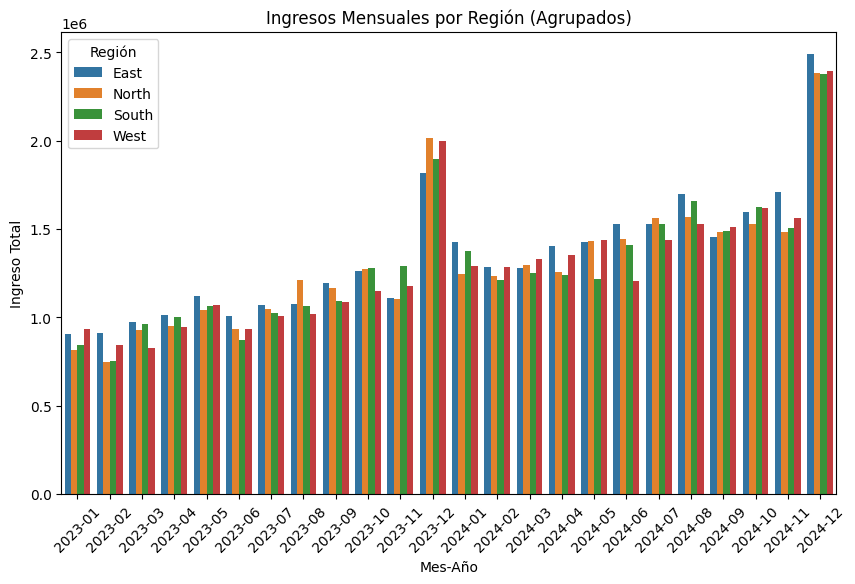

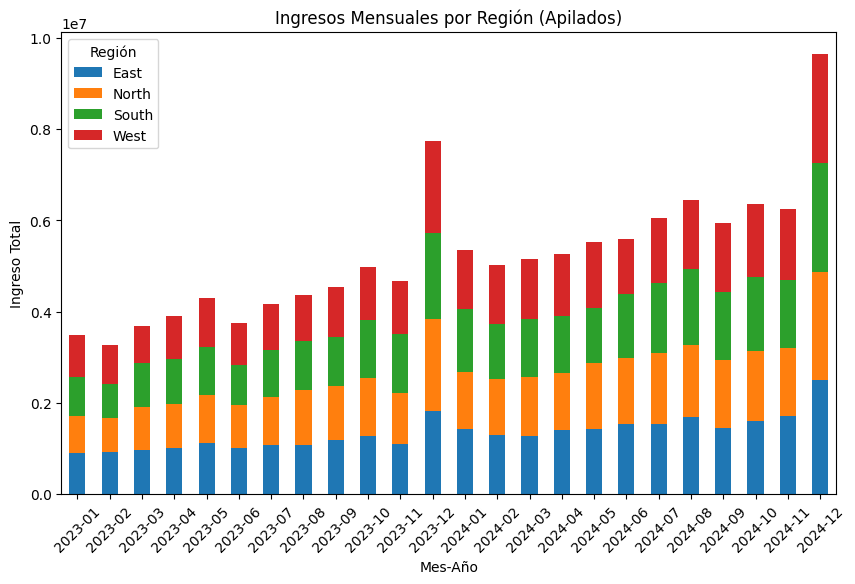

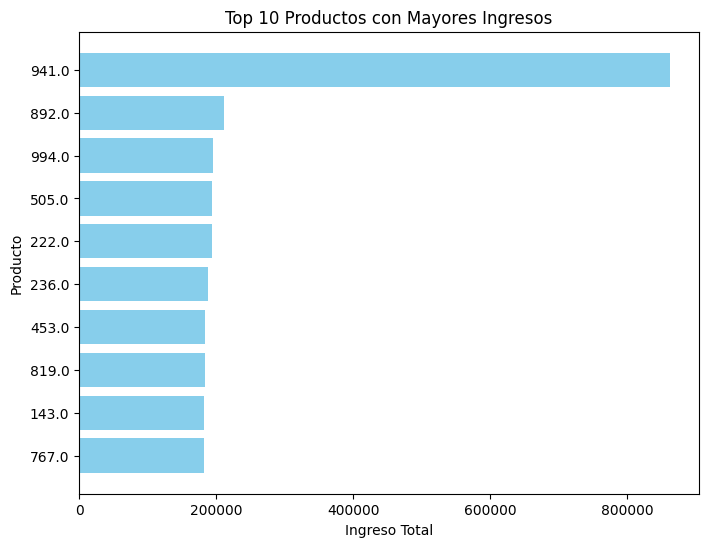

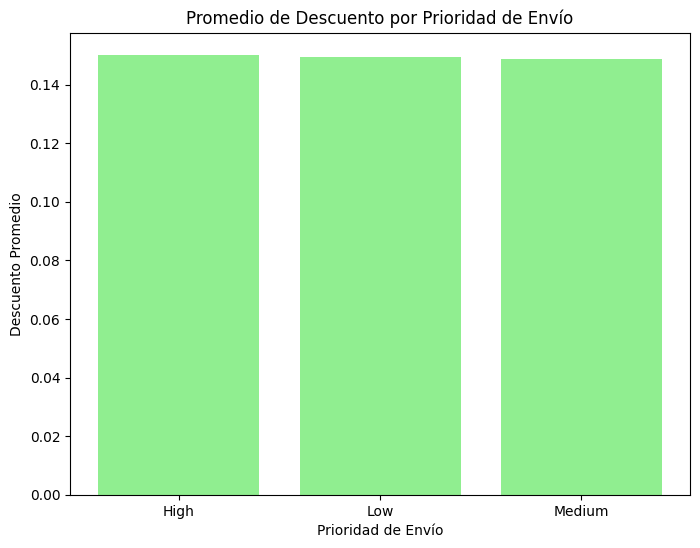

C:\Users\carlo\AppData\Local\Temp\ipykernel_10536\663427369.py:71: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.

C:\Users\carlo\AppData\Local\Temp\ipykernel_10536\663427369.py:71: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.

C:\Users\carlo\AppData\Local\Temp\ipykernel_10536\663427369.py:71: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



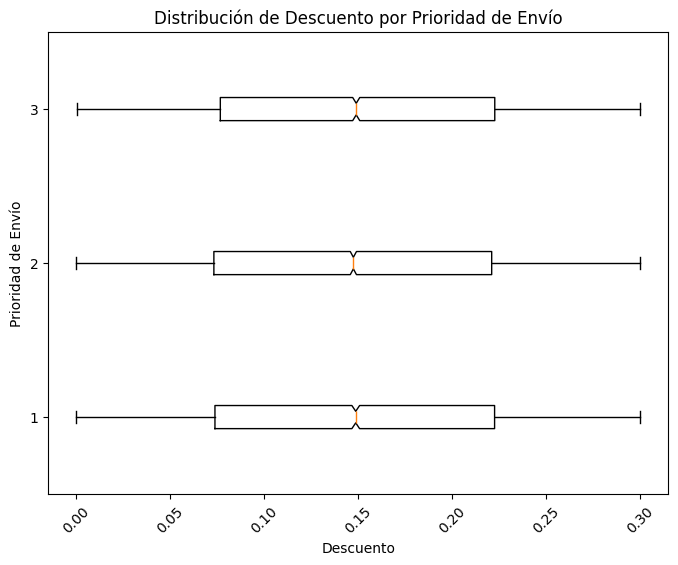

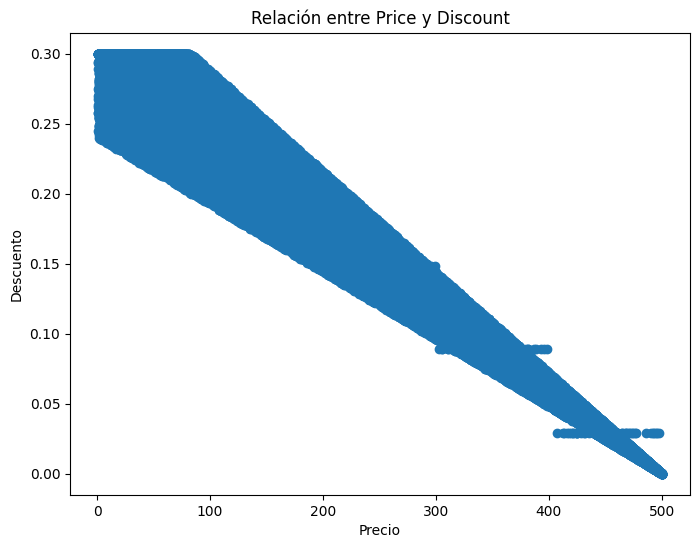

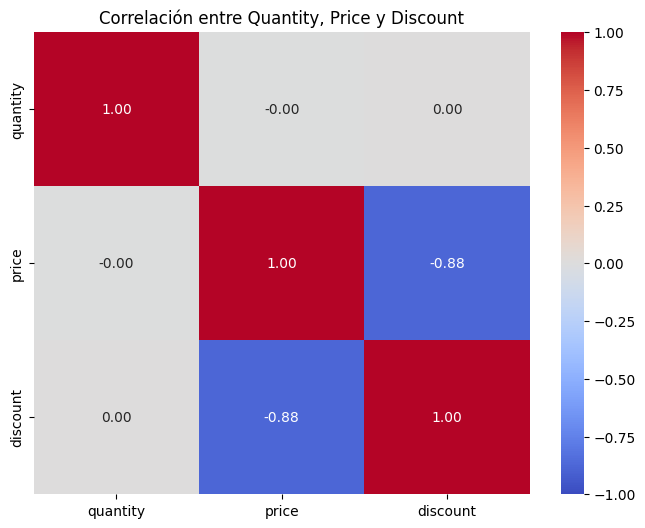

In [ ]:
#ejecucion del reporte
generar_reportes(df)

## ANÁLISIS

1. Ingresos mensuales por región: Personalmente me gusta más plotly que matplotlib porque es interactivo. En cuanto al tipo de gráfico, al tratarse de regiones considero que las barras apiladas en este caso son las más adecuadas pues se asemejan a la participación porcentual de las regiones por mes. Lo cual me parece más intuitivo. Otro aspecto a ver es que aquí se comprueba que los datos sintéticos sí se crearon correctamente dado que se observa una tendencia creciente en los últimos meses. Por tro lado las distribuciones de las regiones en cuanto a ingresos mensuales se ven homogéneas exceptuando algunos casos.

2. Top 10 Productos: Se confirma el resultado obtenido en los análisis iniciales, donde 941 era el que lideraba el ranking de ingresos. En este caso se escoge un gráfico de barras vertical, dado que considero es la mejor manera de dar cuenta de un ranking.

3. Diferencias por prioridad: Según lo observado no parece existir diferencia significativa (se puede profundizar con prueba de hipótesis para diferencia de medias) entre prioridades en términos de descuento. Ni el gráfico de barras ni los boxplot muestran mayores diferencias, por lo que no es concluyente poder decir que a mayor descuenta mayor es la prioridad de envío. 

4. Ingreso por región (barras): En este punto se observa más claramente la tendencia de largo plazo creciente y un patrón de estacionalidad en los meses de diciembre, dado que todas las regiones tuvieron unos mayores ingresos o ingresos superiores en dicho mes, tanto en 2023 como 2024, respecto a otros meses.

5. Correlaciones: Existe una correlación en dirección inversa o negativa entre precio y descuento. Ahora bien esa relación negativa alta entre precio y descuento podría deberse a que los productos de mayor precio son a los que menos descuentos se les quiere realizar, no es deseable para el vendedor, sí lo es para el cliente.

6. La conclusión de la correlación se comprueba con el gráfico de dispersión, a mayor precio menor es el descuento que se le realiza el cliente.